<img src='sr.png' />

In [5]:
#!pip install scikit-learn

In [6]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [8]:
# Original Raw Data
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [10]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


In [11]:
df['total_spent'] = df['TV'] + df['radio'] + df['newspaper']

In [12]:
df.drop(columns=['TV','radio','newspaper'], inplace= True)

In [13]:
df.corr()

,sales,total_spent
sales,1.000000,0.867712
total_spent,0.867712,1.000000


In [14]:
X = df[['total_spent']]
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
print(model.intercept_)
print(model.coef_)

4169.512013489044
[0.0489571]


In [22]:
sales_pred = model.predict([[200000]])
print(sales_pred)

[13960.93124868]


/Users/durgaprasad/Desktop/_WEEKEND/DAY1-Python-Flask/basicpythonenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
#Training data 

sales_pred_train = model.predict(X_train)
mse = mean_squared_error(y_train, sales_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train,sales_pred_train)

print("Root Mean Squared Error:", rmse.round().astype(int))
print("R-squared:", r2)

Root Mean Squared Error: 2534
R-squared: 0.7524092686260718


In [17]:
#Testing Data
sales_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test,sales_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,sales_pred_test)

print("Root Mean Squared Error:", rmse.round().astype(int))
print("R-squared:", r2)

Root Mean Squared Error: 2789
R-squared: 0.7535196255373878


In [18]:
#Calculating cross validation matrics

scores = cross_val_score(model,X,y,cv=5)
print(scores)
print('Cross Validation :', scores.mean())


[0.74964192 0.79455226 0.76417134 0.74872042 0.65980565]
Cross Validation : 0.7433783178555419


In [19]:
df.head()

,sales,total_spent
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


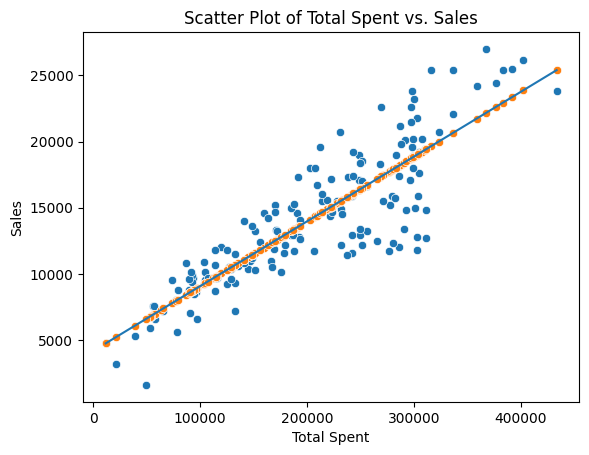

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined X_train and y_train
sns.scatterplot(x=X_train['total_spent'], y=y_train)
sns.scatterplot(x=X_train['total_spent'], y=sales_pred_train)
sns.lineplot(x = X_train['total_spent'], y = sales_pred_train)
plt.title('Scatter Plot of Total Spent vs. Sales')
plt.xlabel('Total Spent')
plt.ylabel('Sales')
plt.show()


In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming you have defined your X_train and y_train
# Create a DataFrame from your training data
data = pd.concat([X_train, y_train], axis=1)

# Fit an OLS regression model
model = smf.ols(formula='sales ~ total_spent', data=data).fit()

# Print the model summary
print(model.summary())

ModuleNotFoundError: No module named 'statsmodels'